No handles with labels found to put in legend.


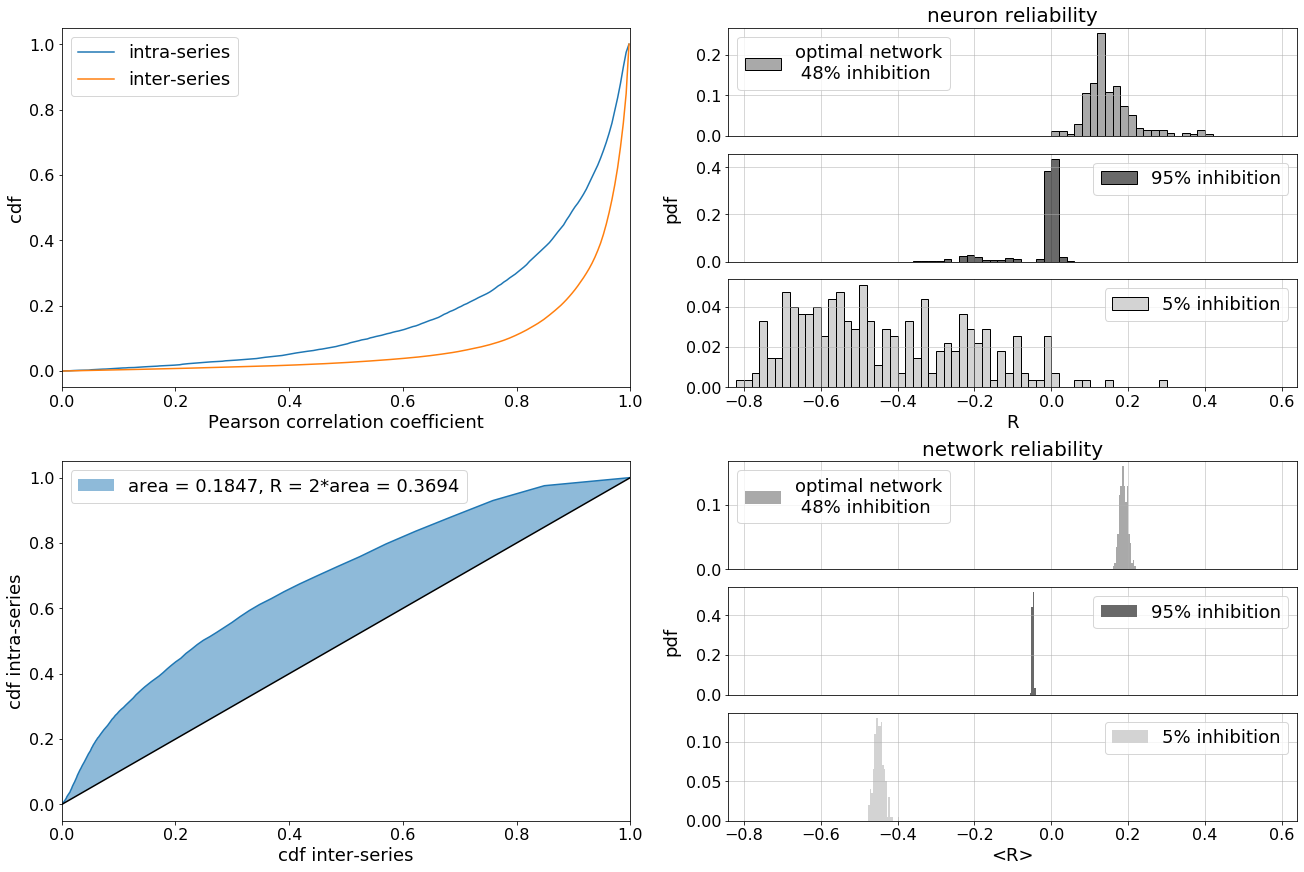

In [8]:
import matplotlib.pyplot as plt
import numpy as np

CDF_intra = np.genfromtxt(open("fig6_CDF_intra.csv", "rb"), delimiter=",")
CDF_inter = np.genfromtxt(open("fig6_CDF_inter.csv", "rb"), delimiter=",")
binsCDF = np.genfromtxt(open("fig6_binsCDF.csv", "rb"), delimiter=",")

AUROC = np.trapz(CDF_intra,CDF_inter) - 0.5

Rvec = np.genfromtxt(open("fig6_Rneurons_2.csv", "rb"), delimiter=",")
Rvec95 = np.genfromtxt(open("fig6_Rneurons95.csv", "rb"), delimiter=",")
Rvec5 = np.genfromtxt(open("fig6_Rneurons5.csv", "rb"), delimiter=",")

widNeurons = 0.01

[Rvec,binsNeurons] = np.histogram(Rvec,bins=np.arange(0,1+widNeurons,widNeurons))
[Rvec95,binsNeurons] = np.histogram(Rvec95,bins=np.arange(0,1+widNeurons,widNeurons))
[Rvec5,binsNeurons] = np.histogram(Rvec5,bins=np.arange(0,1+widNeurons,widNeurons))

binsNeurons = 2*(binsNeurons-0.5)
Rvec = Rvec / np.sum(Rvec)
Rvec95 = Rvec95 / np.sum(Rvec95)
Rvec5 = Rvec5 / np.sum(Rvec5)

meanRvec = np.genfromtxt(open("fig6_Rdistro.csv", "rb"), delimiter=",")
meanRvec95 = np.genfromtxt(open("fig6_Rdistro95.csv", "rb"), delimiter=",")
meanRvec5 = np.genfromtxt(open("fig6_Rdistro5.csv", "rb"), delimiter=",")

meanRvec = meanRvec[:200]
meanRvec95 = meanRvec95[:200]
meanRvec5 = meanRvec5[:200]

widR = 0.002

[Rdistribution,bins] = np.histogram(meanRvec,bins=np.arange(0,1+widR,widR))
[Rdistribution95,bins] = np.histogram(meanRvec95,bins=np.arange(0,1+widR,widR))
[Rdistribution5,bins] = np.histogram(meanRvec5,bins=np.arange(0,1+widR,widR))

bins = 2*(bins - 0.5)

Rdistribution = Rdistribution / np.sum(Rdistribution)
Rdistribution95 = Rdistribution95 / np.sum(Rdistribution95)
Rdistribution5 = Rdistribution5 / np.sum(Rdistribution5)

fSize = 18; lPad = 20; labelPos = -0.1; alpha = 0.5

width = 18
height = 12
fig = plt.figure(figsize=(width,height),constrained_layout=True)

gs = fig.add_gridspec(6, 2)
ax1 = fig.add_subplot(gs[0:3, 0])
ax2 = fig.add_subplot(gs[3:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])
ax7 = fig.add_subplot(gs[4, 1])
ax8 = fig.add_subplot(gs[5, 1])

ax1.plot(binsCDF[:-1]+np.diff(binsCDF)/2, CDF_intra,label=r'intra-series')
ax1.plot(binsCDF[:-1]+np.diff(binsCDF)/2, CDF_inter,label=r'inter-series')
leg = plt.legend(fontsize=fSize)
ax1.set_ylabel('cdf',fontsize=fSize)
ax1.set_xlabel('Pearson correlation coefficient',fontsize=fSize)
ax1.set_xlim((0,1))

ax2.plot(CDF_inter, CDF_intra)
ax2.plot([0,1], [0, 1], color='black')
ax2.fill_between(CDF_inter,CDF_inter,CDF_intra, alpha = 0.5, label='area = '+str(round(AUROC,4))+', R = 2*area = '+str(2*round(AUROC,4)))
#ax2.set_title('ROC',fontsize=fSize+2)
ax2.set_ylabel('cdf intra-series',fontsize=fSize)
ax2.set_xlabel('cdf inter-series',fontsize=fSize)
ax2.set_xlim((0,1))

ax1.xaxis.set_tick_params(labelsize=fSize-2)
ax2.xaxis.set_tick_params(labelsize=fSize-2)
ax1.yaxis.set_tick_params(labelsize=fSize-2)
ax2.yaxis.set_tick_params(labelsize=fSize-2)
ax1.legend(fontsize=fSize)
ax2.legend(fontsize=fSize)

ax3.set_title("neuron reliability",fontsize=fSize+2)
bar = ax3.bar(binsNeurons[:-1]+np.diff(binsNeurons)/2, Rvec, width = 2*widNeurons, facecolor='darkgray', edgecolor='black', label='optimal network\n 48% inhibition') 
ax3.set_xlim([-0.84,0.64])

bar = ax4.bar(binsNeurons[:-1]+np.diff(binsNeurons)/2, Rvec95, width = 2*widNeurons, facecolor='dimgray', edgecolor='black', label='95% inhibition') 
ax4.set_ylabel('pdf',fontsize=fSize)
ax4.set_xlim([-0.84,0.64])

bar = ax5.bar(binsNeurons[:-1]+np.diff(binsNeurons)/2, Rvec5, width = 2*widNeurons, facecolor='lightgray', edgecolor='black', label='5% inhibition') 
ax5.set_xlabel('R',fontsize=fSize)
ax5.set_xlim([-0.84,0.64])

ax5.xaxis.set_tick_params(labelsize=fSize-2)
ax4.tick_params(axis='x', direction='in', bottom=False, top=False, labelbottom=False) 
ax3.tick_params(axis='x', direction='in', bottom=False, top=False, labelbottom=False)
ax5.grid(linewidth='0.5')
ax4.grid(linewidth='0.5')
ax3.grid(linewidth='0.5')


ax5.yaxis.set_tick_params(labelsize=fSize-2)
ax4.yaxis.set_tick_params(labelsize=fSize-2)
ax3.yaxis.set_tick_params(labelsize=fSize-2)
ax5.legend(fontsize=fSize)
ax4.legend(fontsize=fSize)
ax3.legend(fontsize=fSize)

ax6.set_title('network reliability',fontsize=fSize+2)
ax6.grid(linewidth='0.5')
bar = ax6.bar(bins[:-1]+np.diff(bins)/2, Rdistribution, width = 2*widR, facecolor='darkgray', label='optimal network\n 48% inhibition') 
ax6.set_xlim([-0.84,0.64])

ax7.grid(linewidth='0.5')
bar = ax7.bar(bins[:-1]+np.diff(bins)/2, Rdistribution95, width = 2*widR, facecolor='dimgray', label='95% inhibition') 
ax7.set_ylabel('pdf',fontsize=fSize)
ax7.set_xlim([-0.84,0.64])

ax8.grid(linewidth='0.5')
bar = ax8.bar(bins[:-1]+np.diff(bins)/2, Rdistribution5, width = 2*widR, facecolor='lightgray', label='5% inhibition') 
ax8.set_xlabel('<R>',fontsize=fSize)
ax8.set_xlim([-0.84,0.64])

ax8.xaxis.set_tick_params(labelsize=fSize-2)
ax7.tick_params(axis='x', direction='in', bottom=False, top=False, labelbottom=False) 
ax6.tick_params(axis='x', direction='in', bottom=False, top=False, labelbottom=False)
ax8.grid(linewidth='0.5')
ax7.grid(linewidth='0.5')
ax6.grid(linewidth='0.5')
ax8.yaxis.set_tick_params(labelsize=fSize-2)
ax7.yaxis.set_tick_params(labelsize=fSize-2)
ax6.yaxis.set_tick_params(labelsize=fSize-2)
ax8.legend(fontsize=fSize)
ax7.legend(fontsize=fSize)
ax6.legend(fontsize=fSize)

labelpos = -0.085
ax8.yaxis.set_label_coords(labelpos, 0.5)
ax7.yaxis.set_label_coords(labelpos, 0.5)
ax6.yaxis.set_label_coords(labelpos, 0.5)
ax5.yaxis.set_label_coords(labelpos, 0.5)
ax4.yaxis.set_label_coords(labelpos, 0.5)
ax3.yaxis.set_label_coords(labelpos, 0.5)
fig.savefig('fig6.pdf')

plt.show()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

meanRvec = np.genfromtxt(open("fig6_Rdistro.csv", "rb"), delimiter=",")
meanRvec95 = np.genfromtxt(open("fig6_Rdistro95.csv", "rb"), delimiter=",")
meanRvec5 = np.genfromtxt(open("fig6_Rdistro5.csv", "rb"), delimiter=",")

In [7]:
len(meanRvec)

227